In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
#insert dataset
df=pd.read_csv("C:\\Users\\Sriram\\Documents\\forest-fires-in-brazil\\amazon.csv",encoding='ISO-8859-1')
df.head(10)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


In [3]:
month=df["month"].unique().tolist()
month

['Janeiro',
 'Fevereiro',
 'Março',
 'Abril',
 'Maio',
 'Junho',
 'Julho',
 'Agosto',
 'Setembro',
 'Outubro',
 'Novembro',
 'Dezembro']

In [4]:
bulan=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
for i in range(0, len(bulan)):
    df['month'][df['month']==month[i]]=bulan[i]
df.head()

,year,state,month,number,date
0,1998,Acre,Jan,0.0,1998-01-01
1,1999,Acre,Jan,0.0,1999-01-01
2,2000,Acre,Jan,0.0,2000-01-01
3,2001,Acre,Jan,0.0,2001-01-01
4,2002,Acre,Jan,0.0,2002-01-01


In [5]:
#Check Missing Values
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [6]:
df.describe() #EDA 

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [7]:
df.dtypes

year        int64
state      object
month      object
number    float64
date       object
dtype: object

                  year  month  number  date
state                                      
Acre               239    239     239   239
Alagoas            240    240     240   240
Amapa              239    239     239   239
Amazonas           239    239     239   239
Bahia              239    239     239   239
Ceara              239    239     239   239
Distrito Federal   239    239     239   239
Espirito Santo     239    239     239   239
Goias              239    239     239   239
Maranhao           239    239     239   239
Mato Grosso        478    478     478   478
Minas Gerais       239    239     239   239
Paraiba            478    478     478   478
Pará               239    239     239   239
Pernambuco         239    239     239   239
Piau               239    239     239   239
Rio                717    717     717   717
Rondonia           239    239     239   239
Roraima            239    239     239   239
Santa Catarina     239    239     239   239
Sao Paulo          239    239   

[Text(0, 0, 'Acre'),
 Text(0, 0, 'Alagoas'),
 Text(0, 0, 'Amapa'),
 Text(0, 0, 'Amazonas'),
 Text(0, 0, 'Bahia'),
 Text(0, 0, 'Ceara'),
 Text(0, 0, 'Distrito Federal'),
 Text(0, 0, 'Espirito Santo'),
 Text(0, 0, 'Goias'),
 Text(0, 0, 'Maranhao'),
 Text(0, 0, 'Mato Grosso'),
 Text(0, 0, 'Minas Gerais'),
 Text(0, 0, 'Pará'),
 Text(0, 0, 'Paraiba'),
 Text(0, 0, 'Pernambuco'),
 Text(0, 0, 'Piau'),
 Text(0, 0, 'Rio'),
 Text(0, 0, 'Rondonia'),
 Text(0, 0, 'Roraima'),
 Text(0, 0, 'Santa Catarina'),
 Text(0, 0, 'Sao Paulo'),
 Text(0, 0, 'Sergipe'),
 Text(0, 0, 'Tocantins')]

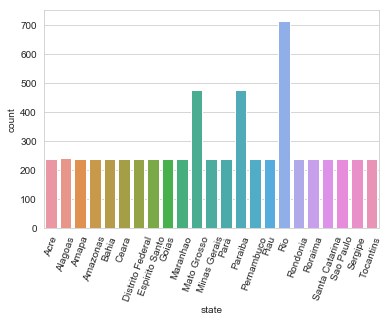

In [8]:
print(df.groupby(['state']).count())
state_plot=sns.countplot(x='state',data=df)
state_plot.set_xticklabels(state_plot.get_xticklabels(), rotation = 70)

In [9]:
essential_data=df.groupby(by=['year','state','month']).sum().reset_index()
essential_data

,year,state,month,number
0,1998,Acre,Apr,0.000
1,1998,Acre,Aug,130.000
2,1998,Acre,Dec,7.000
3,1998,Acre,Feb,0.000
4,1998,Acre,Jan,0.000
5,1998,Acre,Jul,37.000
6,1998,Acre,Jun,3.000
7,1998,Acre,Mar,0.000
8,1998,Acre,May,0.000
9,1998,Acre,Nov,0.000


(1998, 2017)

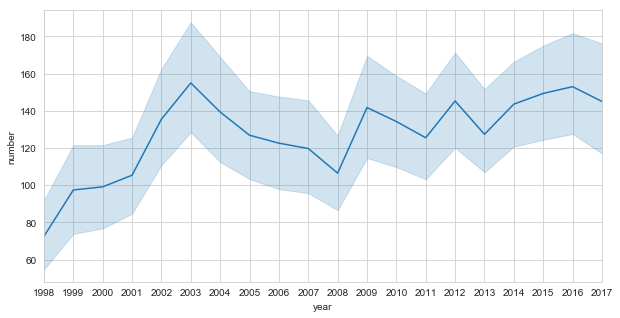

In [10]:
from matplotlib.pyplot import MaxNLocator,FuncFormatter
plt.figure(figsize=(10,5))
plot=sns.lineplot(data=essential_data,x='year',y='number',markers=True)
plot.xaxis.set_major_locator(plt.MaxNLocator(19))
plot.set_xlim(1998,2017)

1. 2003 shows the highest number of forest fires.
2. 2008 and 2001 show similar numbers of forest fires.
3. The level of forest fires increased during 1998 to 2003, 2008-2009, 2011-2012, 2013-2018
4. The level of forest fires declined during 2003 to 2008, 2009-2011, 2012-2013

Shall we split the dataset into increasing and decreasing number of forest fires and try to find some inner meanings from them ?

In [11]:
year_number_data=essential_data[['year','number']]
year_number_data[year_number_data['year']==1998]

,year,number
0,1998,0.000
1,1998,130.000
2,1998,7.000
3,1998,0.000
4,1998,0.000
5,1998,37.000
6,1998,3.000
7,1998,0.000
8,1998,0.000
9,1998,0.000


The level of forest fires increased during 1998 to 2003, 2008-2009, 2011-2012, 2013-2017

The level of forest fires decreased during 2003 to 2008, 2009-2011, 2012-2013

In [12]:
increasing_list = [1998, 1999, 2000, 2001, 2002, 2008, 2011, 2013, 2014, 2015]
decreasing_list = [2003, 2004, 2005, 2006, 2007, 2009, 2010, 2012, 2016]

increasing_dataframe = pd.DataFrame()
for i in increasing_list:
    df = year_number_data[year_number_data['year'] == i]
    increasing_dataframe = increasing_dataframe.append([df])
increasing_dataframe.head()

,year,number
0,1998,0.0
1,1998,130.0
2,1998,7.0
3,1998,0.0
4,1998,0.0


In [13]:
decreasing_dataframe = pd.DataFrame()
for i in decreasing_list:
    df1 = year_number_data[year_number_data['year'] == i]
    decreasing_dataframe = decreasing_dataframe.append([df1])
decreasing_dataframe.head()

,year,number
1380,2003,1.000
1381,2003,1.976
1382,2003,1.000
1383,2003,0.000
1384,2003,10.000


(1998, 2017)

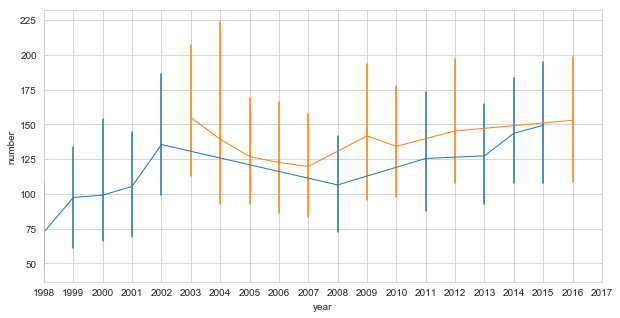

In [14]:
plt.figure(figsize=(10,5))
plot=sns.lineplot(data=increasing_dataframe,
                 x='year',
                 y='number',
                 lw=1,
                 err_style="bars",
                 ci=100)
plot=sns.lineplot(data=decreasing_dataframe,
                 x='year',
                 y='number',
                 lw=1,
                 err_style="bars",
                 ci=100)
plot.xaxis.set_major_locator(plt.MaxNLocator(19))
plot.set_xlim(1998,2017)

We divide the years into increasing numbers of fires and reducing the number of fires. We can conclude that the number of fires has increased over the last few decades (even if we consider decreasing the number of fires over several years, it does not win over the increasing number of fires for the remaining years). There is a serious need to consider saving Brazil's forests.